# Portugal Bank Marketing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading data
data=pd.read_csv(r"C:\Users\RBI\Downloads\ML Question Paper\Datasets\bank.csv",sep=";")

In [3]:
# display all columns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [8]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

### What is the age group of people

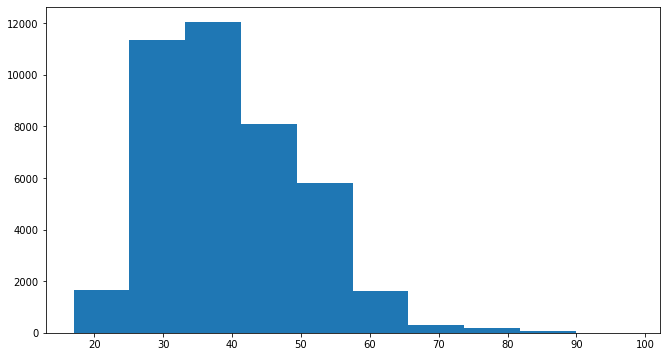

In [9]:
plt.figure(figsize=(11, 6))
plt.hist(x='age', data=data, bins=10)
plt.show()

Most of the people lie in the th age group of 35 to 42.

### Which occupation people have subscribed a term deposit? 

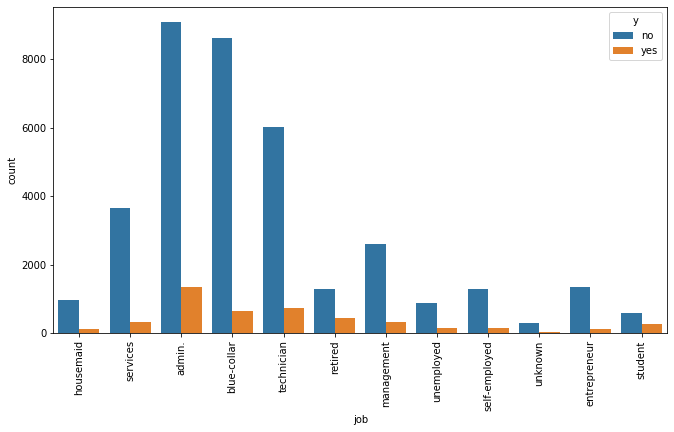

In [10]:
plt.figure(figsize=(11, 6))
sns.countplot(data=data, x='job', hue='y')
plt.xticks(rotation=90)

plt.show()

People with admin occupation have a long term deposit are more followed by technician and blue-collar.

### What is the marital status of people

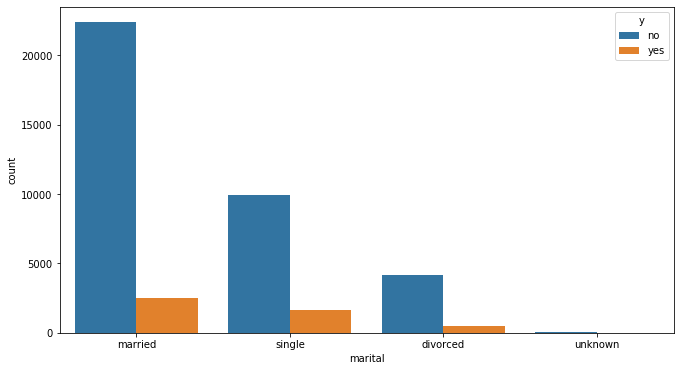

In [11]:
plt.figure(figsize=(11, 6))
sns.countplot(data=data, x='marital', hue='y')

plt.show()

Most of the people are married,followed by single people and then divorced.There is very less percentage of people whose marital status is unknown.

#### Handeling missing values

In [12]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values.

In [13]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
for i in data.columns:
    print({i:data[i].unique()})

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)}
{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object)}
{'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)}
{'default': array(['no', 'unknown', 'yes'], dtype=object)}
{'housing': array(['no', 'yes', 'unknown'], dtype=object)}
{'loan': array(['no', 'yes', 'unknown'], dtype=object)}
{'c

There are 'unknown' data present, replace them with null values

In [15]:
data.replace('unknown', np.nan, inplace=True)

In [16]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Now missing values can be seen

In [17]:
# replace the missing values with mode values as the missing values are from categorical variables

for i in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [18]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The unknown values are removed and No missing values are present.

#### Label Encoding 

In [19]:
colname=[]

for i in data.columns:
    if data[i].dtype=='object':
        colname.append(i)
colname
    

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [20]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    data[x]=le.fit_transform(data[x])

In [21]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,0,0,0,1,6,1,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,6,0,0,0,1,6,1,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,1,0,1,6,1,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,1,0,1,6,1,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Splitting data into train test

In [22]:
# Create X & Y
X=data.values[:,0:-1]
Y=data.values[:,-1]

In [23]:
print(X.shape)
print(Y.shape)

(41188, 20)
(41188,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)   

#### Scale the data

In [25]:
# In this case scaling is ideally not required beacause all the variables have almost same number of categories.

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

#### Model Building
Random Forest model

In [27]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=100,                  
                                          random_state=10, bootstrap=True,  
                                          n_jobs=-1)                        
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10575   360]
 [  739   683]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10935
         1.0       0.65      0.48      0.55      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357

Accuracy of the model:  0.9110625556364813


The model predicts very well on class 0 but it is not able to predict well on class 1. This meanins that data is highly imbalanced.

In [3]:
# important features
sample=pd.DataFrame()
 
sample["Column"]=data.columns[0:-1]
sample["Imp value"]=model_RandomForest.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

NameError: name 'pd' is not defined

The important Features are listed in the descending order. Top most important feature are duration, euribor 3 month rate, age & number of employees. 

In [31]:
# Drop the 'default' column as it the the most unimportant column

data.drop('default',axis=1,inplace=True)

In [32]:
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [33]:
data.shape

(41188, 20)

#### Handling unbalanced data using SMOTE

In [34]:
X=data.values[:,:-1]
Y=data.values[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 10)  

In [44]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_new, Y_train_new = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_new.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_new.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_new == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_new == 0)))

Before OverSampling, counts of label '1':  3218
Before OverSampling, counts of label '0':  25613
After OverSampling, the shape of train_X:  (51226, 19)
After OverSampling, the shape of train_y:  (51226,)
After OverSampling, counts of label '1':  25613
After OverSampling, counts of label '0':  25613


Both the classes have same amount of data i.e. 25613

#### Standardize the data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

#### Model building after applying SMOTE 
a. Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

# create a model object
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train_new, Y_train_new)


Y_pred_1=classifier.predict(X_test)
print(Y_pred_1)

[1. 0. 1. ... 0. 0. 0.]


C:\Users\RBI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [90]:
# generating ,matrix
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.33624804, 0.66375196],
       [0.60875744, 0.39124256],
       [0.18023461, 0.81976539],
       ...,
       [0.9801139 , 0.0198861 ],
       [0.96135627, 0.03864373],
       [0.97541807, 0.02458193]])

In [91]:
# print(list(zip(Y_test, Y_pred)))

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10453   482]
 [  635   787]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     10935
         1.0       0.62      0.55      0.58      1422

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357

Accuracy of the model:  0.9096058913975884


#### Tuning the model

In [103]:
# Changing the threashold to 0.49
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)
 
y_pred_class=[]
for value in y_pred_prob[:,1]: 
    if value > 0.49:                
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

[[0.33624804 0.66375196]
 [0.60875744 0.39124256]
 [0.18023461 0.81976539]
 ...
 [0.9801139  0.0198861 ]
 [0.96135627 0.03864373]
 [0.97541807 0.02458193]]


In [104]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

print(classification_report(Y_test, y_pred_class))

[[9243 1692]
 [ 206 1216]]
Accuracy of the model:  0.846402848587845
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91     10935
         1.0       0.42      0.86      0.56      1422

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.73     12357
weighted avg       0.91      0.85      0.87     12357



In [105]:
# Changing the threashold to 0.4
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)
 
y_pred_class=[]
for value in y_pred_prob[:,1]: 
    if value > 0.50:                
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

[[0.33624804 0.66375196]
 [0.60875744 0.39124256]
 [0.18023461 0.81976539]
 ...
 [0.9801139  0.0198861 ]
 [0.96135627 0.03864373]
 [0.97541807 0.02458193]]


In [106]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

print(classification_report(Y_test, y_pred_class))

[[9291 1644]
 [ 215 1207]]
Accuracy of the model:  0.8495589544387796
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91     10935
         1.0       0.42      0.85      0.56      1422

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.74     12357
weighted avg       0.91      0.85      0.87     12357



In [57]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 2269  , type 2 error : 150  , type 1 error: 2119
Errors at threshold  0.41000000000000003 : 2227  , type 2 error : 153  , type 1 error: 2074
Errors at threshold  0.42000000000000004 : 2168  , type 2 error : 155  , type 1 error: 2013
Errors at threshold  0.43000000000000005 : 2129  , type 2 error : 160  , type 1 error: 1969
Errors at threshold  0.44000000000000006 : 2095  , type 2 error : 166  , type 1 error: 1929
Errors at threshold  0.45000000000000007 : 2056  , type 2 error : 176  , type 1 error: 1880
Errors at threshold  0.4600000000000001 : 2018  , type 2 error : 185  , type 1 error: 1833
Errors at threshold  0.4700000000000001 : 1974  , type 2 error : 193  , type 1 error: 1781
Errors at threshold  0.4800000000000001 : 1931  , type 2 error : 196  , type 1 error: 1735
Errors at threshold  0.4900000000000001 : 1898  , type 2 error : 206  , type 1 error: 1692
Errors at threshold  0.5000000000000001 : 1859  , type 2 error : 215  , type 1 error: 1644
Errors at

In [56]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1163  , type 2 error : 749  , type 1 error: 414
Errors at threshold  0.41000000000000003 : 1161  , type 2 error : 763  , type 1 error: 398
Errors at threshold  0.42000000000000004 : 1160  , type 2 error : 778  , type 1 error: 382
Errors at threshold  0.43000000000000005 : 1152  , type 2 error : 783  , type 1 error: 369
Errors at threshold  0.44000000000000006 : 1156  , type 2 error : 799  , type 1 error: 357
Errors at threshold  0.45000000000000007 : 1163  , type 2 error : 814  , type 1 error: 349
Errors at threshold  0.4600000000000001 : 1157  , type 2 error : 822  , type 1 error: 335
Errors at threshold  0.4700000000000001 : 1154  , type 2 error : 832  , type 1 error: 322
Errors at threshold  0.4800000000000001 : 1155  , type 2 error : 845  , type 1 error: 310
Errors at threshold  0.4900000000000001 : 1153  , type 2 error : 857  , type 1 error: 296
Errors at threshold  0.5000000000000001 : 1146  , type 2 error : 860  , type 1 error: 286
Errors at threshold 

b. Decision Trees

In [109]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,criterion='gini')

# create a model object


# fitting training data to the model
model_DecisionTree.fit(X_train_res, Y_train_res)

Y_pred=model_DecisionTree.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10237   698]
 [  703   719]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     10935
         1.0       0.51      0.51      0.51      1422

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357

Accuracy of the model:  0.8866229667394999


#### Tuning descision tree model


In [111]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,criterion='gini',
                                         splitter="best",                         # default splitter is "best"
                                         min_samples_leaf=3,
                                         min_samples_split=5,
                                         max_depth=10)


# 


# fitting training data to the model
model_DecisionTree.fit(X_train, Y_train)

Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10442   493]
 [  693   729]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     10935
         1.0       0.60      0.51      0.55      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.90      0.90     12357

Accuracy of the model:  0.9040220118151655


 c. Random Forest

In [113]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=100,                  
                                          random_state=10, bootstrap=True,  
                                          n_jobs=-1)                        
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)
 
Y_pred=model_RandomForest.predict(X_test)

In [114]:
# print classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
acc_rf=accuracy_score(Y_test, Y_pred)

[[10453   482]
 [  635   787]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     10935
         1.0       0.62      0.55      0.58      1422

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357

0.9096058913975884


#### Create a table for output

In [115]:

col={'Accuracy':['85%','90%', '91%'], "recall_class 0":[0.85, 0.95,0.96 ], 'recall_class 1':[0.85, 0.51,0.55   ]}



table=pd.DataFrame(col, index=['Logistic Regression','Descision Tree','Random Forest'])

In [116]:
table

,Accuracy,recall_class 0,recall_class 1
Logistic Regression,85%,0.85,0.85
Descision Tree,90%,0.95,0.51
Random Forest,91%,0.96,0.55


The Logistic Regression Model gives the best recall value for both the classes. The two classes are predicted equally. It has an accuracy score of 85%.